In [24]:
import matplotlib.pyplot as plt

In [3]:
import os
import pandas as pd

from env import user, host, password


def get_connection(db, user=user, host=host, password=password):
    
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'


def acquire_store():
    
    filename = 'store.csv'
    
    if os.path.exists(filename):
        
        return pd.read_csv(filename)
    
    else:
        
        query = '''
                SELECT sale_date, sale_amount,
                item_brand, item_name, item_price,
                store_address, store_zipcode
                FROM sales
                LEFT JOIN items USING(item_id)
                LEFT JOIN stores USING(store_id)
                '''
        
        url = get_connection(db='tsa_item_demand')
        
        df = pd.read_sql(query, url)
        
        df.to_csv(filename, index=False)
        
        return df

In [47]:
df = acquire_store()

In [59]:
def datetime_index(df,date_col):
    df[date_col] = pd.to_datetime(df[date_col])
    return df.set_index(date_col).sort_index()

In [49]:
df = datetime_index(df,'sale_date')

In [62]:
def plot_value_counts(df,col):
    plt.title(col)
    df[col].value_counts(bins=20).sort_index().plot()
    plt.xticks(rotation=30)
    plt.show()

    
    

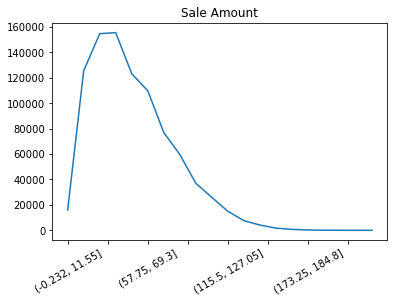

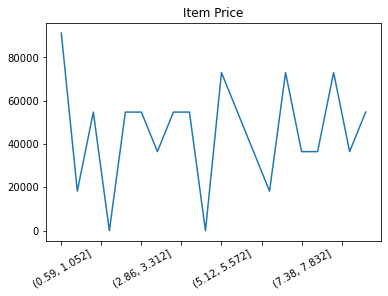

In [51]:
plot_value_counts(df)

In [67]:
def add_features(df):
    df['month'] = df.index.strftime('%B')
    df['day_of_week'] = df.index.strftime('%A')
    return df

In [54]:
df = add_features(df)

In [ ]:
df['sales_total'] = df.sale_amount * df.item_price

In [55]:
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,January,Tuesday,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,January,Tuesday,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,January,Tuesday,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,January,Tuesday,294.00


In [95]:
df = pd.read_csv('opsd_germany',index_col=0)

In [96]:
df=datetime_index(df,'Date')

In [97]:
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


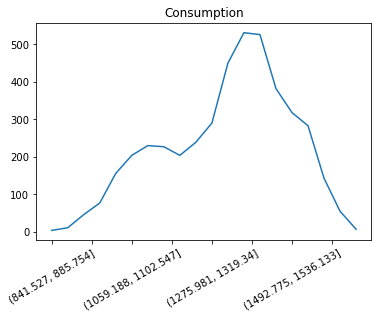

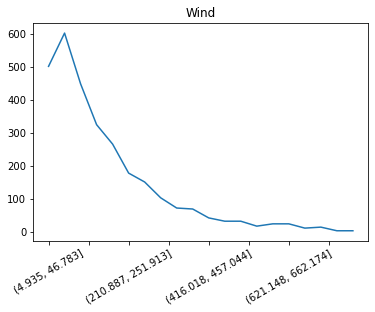

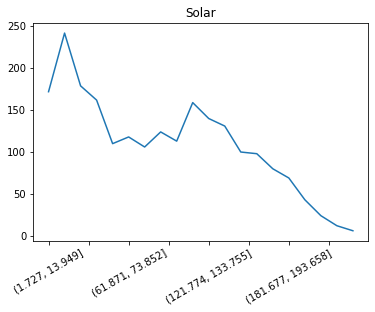

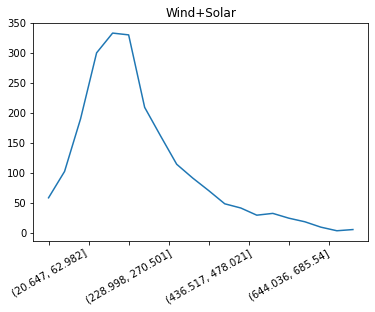

In [98]:
for col in df.columns:
    plot_value_counts(df,col)

In [99]:
df = add_features(df)

In [100]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,day_of_week
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,January,Monday
2006-01-03,1442.533,NaN,NaN,NaN,January,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,January,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,January,Thursday


In [101]:
def fillna_mean(df,col):
    df[col] = df[col].fillna(df[col].mean())
    return df

In [102]:
columns = ['Wind','Solar','Wind+Solar']
for col in columns:
    df = fillna_mean(df,col)

In [103]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,day_of_week
Date,,,,,,
2006-01-01,1069.184,164.814173,89.258695,272.663481,January,Sunday
2006-01-02,1380.521,164.814173,89.258695,272.663481,January,Monday
2006-01-03,1442.533,164.814173,89.258695,272.663481,January,Tuesday
2006-01-04,1457.217,164.814173,89.258695,272.663481,January,Wednesday
2006-01-05,1477.131,164.814173,89.258695,272.663481,January,Thursday
